In [1]:
import sys
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

from tools.DataLoader import DataLoader
from tools.ModelTester import ModelTester
from tools.Metrics import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (14.0, 8.0) # set default size of plots

%load_ext autoreload
%autoreload 2

ImportError: cannot import name 'LearningCurveDisplay' from 'sklearn.model_selection' (d:\Programmes\Anaconda\lib\site-packages\sklearn\model_selection\__init__.py)

In [2]:
dl = DataLoader("data/train.csv", class_col_name="species", excluded_features={"id"})
dl.load()
dataset = dl.get_dataset()

print(f"Number of data entries : {len(dataset)}")
print(f"Number of classes : {len(dataset.group_by_class())}")

grouppedClasses = pd.DataFrame(
    data=np.array([ len(ds) for ds in dataset.group_by_class() ]),
    columns=["Count"],
    index=[f"{dl.get_label_name(ds.labels[0])}" for ds in dataset.group_by_class()]
)
display(grouppedClasses)

# Stratisfied split !
train_set, test_set = dataset.split_by_class([0.7])
print(f"Train set : {len(train_set)} - Number of classes : {len(train_set.group_by_class())}")
print(f"Train set : {len(test_set)} - Number of classes : {len(test_set.group_by_class())}")

Number of data entries : 990
Number of classes : 99


,Count
Acer_Opalus,10
Pterocarya_Stenoptera,10
Quercus_Hartwissiana,10
Tilia_Tomentosa,10
Quercus_Variabilis,10
Magnolia_Salicifolia,10
Quercus_Canariensis,10
Quercus_Rubra,10
Quercus_Brantii,10
Salix_Fragilis,10


Train set : 693 - Number of classes : 99
Train set : 297 - Number of classes : 99


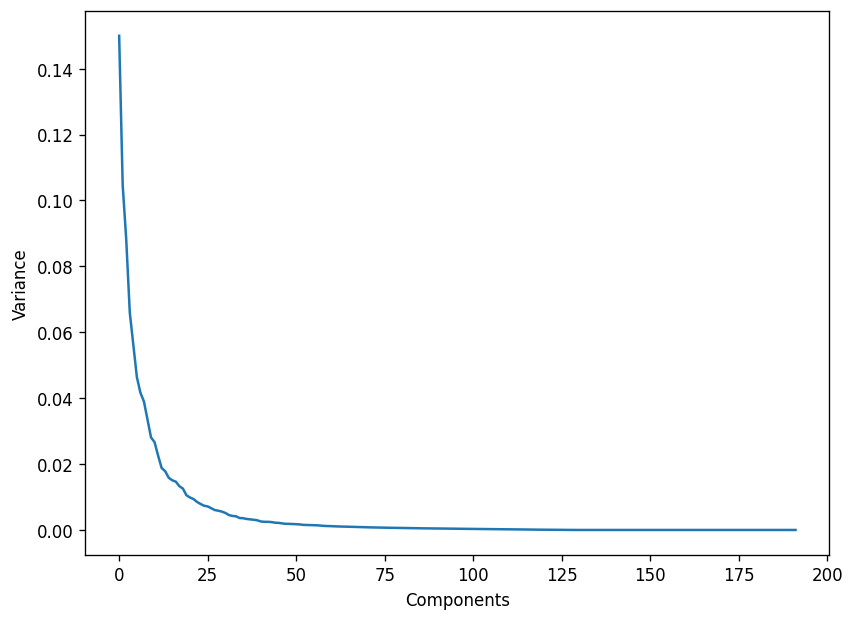

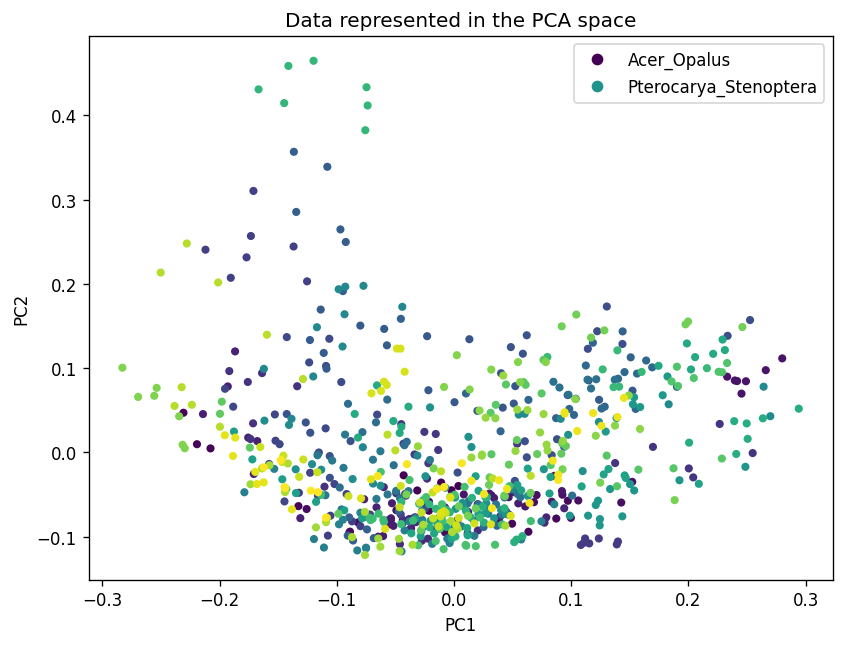

In [ ]:
from sklearn.decomposition import PCA

# Project into the PCA space (2 major axis)
pca = PCA()
pcaSpace = pca.fit_transform(train_set.features)
pcaSpaceXY = (pcaSpace[:,0], pcaSpace[:,1])

# Plot PCA axis contributions
plt.figure(figsize=(8, 6), dpi=120)
plt.plot(pca.explained_variance_ratio_)
plt.ylabel("Variance")
plt.xlabel("Components")
plt.show()

# Plot data in the PCA space (2 major axis)
plt.figure(figsize=(8, 6), dpi=120)
plt.xlabel("PC1")
plt.ylabel("PC2")
scatter = plt.scatter(x=pcaSpaceXY[0], y=pcaSpaceXY[1], c=train_set.labels, s=15)
plt.legend(handles=scatter.legend_elements(num=3)[0], labels=dl.classes)
plt.title("Data represented in the PCA space", loc='center', wrap=True)
plt.show()

In [4]:
# Linear Regression : 
mt = ModelTester("LinearRegression")
mt.test(dataset, train_set, test_set)

# Ridge Regression : 
mt = ModelTester("RidgeRegression")
mt.test(dataset, train_set, test_set)

# Logistic Regression :
mt = ModelTester("LogisticClassifier")
mt.test(dataset, train_set, test_set)

# Perceptron : 
mt = ModelTester("SinglePerceptron")
mt.test(dataset, train_set, test_set)

# SVM : 
mt = ModelTester("SupportVectorMachine")
mt.test(dataset, train_set, test_set)

# Multi-layer Perceptron :
mt = ModelTester("MultiLayerPerceptron")
mt.test(dataset, train_set, test_set)

ImportError: cannot import name 'LearningCurveDisplay' from 'sklearn.model_selection' (d:\Programmes\Anaconda\lib\site-packages\sklearn\model_selection\__init__.py)